# Reconocimiento de dígitos con KNN



Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/schuster/.virtualenvs/metodos/bin/python (found version "3.6.8") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.6m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/schuster/Documents/Facultad/Metodos/metodos-tp2
-- Conf

In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python3 --version
import metnum

/home/schuster/Documents/Facultad/Metodos/metodos-tp2/notebooks
Python 3.6.8


## Explorando los datos

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_train = pd.read_csv("../data/train.csv")

Es un csv, con columnas por cada pixel

In [3]:
df_train[:10]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Reducir el dataset

Ya que el dataset es grande, me quedo con una porción de éste

**<font color=red>ESTO ES SOLO PARA HACER PRUEBAS. CUANDO REPORTEN LOS RESULTADOS, USAR DATASET COMPLETO</font>**

In [4]:
df_train = df_train[:2000]

En el primer caracter está el dígito a reconocer. Llamamos a esto `y_train`

In [5]:
# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

((2000, 784), (2000, 1))

Convierto el resto a matrices de 28 x 28

A ver cómo se ven...

Supuestamente es un 7


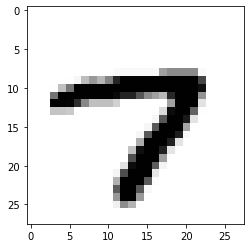

In [6]:
import matplotlib.pyplot as plt

num = 1917

print(f"Supuestamente es un {int(y[num])}")

img = X[num].reshape(28, 28)
plt.imshow(img, cmap="Greys")


### Balance de clases

¿Tenemos la misma cantidad de cada número?

In [7]:
df_train["label"].value_counts(normalize=True)

1    0.1116
2    0.1090
6    0.1032
7    0.1012
0    0.0988
3    0.0960
9    0.0956
8    0.0954
4    0.0954
5    0.0938
Name: label, dtype: float64

No: tenemos más 1 que 5, pero tampoco está tan desbalanceado

### Conjunto de development

In [6]:
limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")


Ahora tengo 1950 instancias de entrenamiento y 50 de validación


In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Acá pueden cambiar el clasificador nuestro por el de sklearn!
pca = metnum.PCA(80)
V = pca.get_eigenvectorMatrix(X_train)

trainPCA = X_train @ V
testPCA = X_val @ V

#clf = metnum.KNNClassifier(100)
#clf = KNeighborsClassifier(100)
#clf.fit(trainPCA, y_train)

/home/schuster/.virtualenvs/metodos/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

In [ ]:
%%time
from sklearn.metrics import accuracy_score
#clf = metnum.KNNClassifier(10)
clf = KNeighborsClassifier(10)
clf.fit(trainPCA, y_train)
y_pred = clf.predict(testPCA)
acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))

In [8]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#clf = metnum.KNNClassifier(10)
clf = KNeighborsClassifier(10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)
print(y_pred)
acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))


/home/schuster/.virtualenvs/metodos/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


[6 6 8 6 3 7 8 3 0 5 4 6 4 2 1 1 1 4 1 6 7 4 1 3 6 9 1 1 3 1 1 6 5 5 8 5 4
 7 0 2 4 0 1 2 1 7 5 3 5 4]
Accuracy: 0.94
CPU times: user 269 ms, sys: 3.88 ms, total: 273 ms
Wall time: 273 ms


In [ ]:
%%time
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(10)
#KFold divides all the samples in  groups of samples, called folds (if , this is equivalent to the Leave One Out strategy), of equal sizes (if possible).
#The prediction function is learned using  folds, and the fold left out is used for test.
from sklearn.model_selection import KFold

data = pd.read_csv("../data/train.csv")
data = df_train[:1000]
kf = KFold(n_splits='int(particiones)')
accArray = []
for df_train, df_test in kf.split(data):
    
    train = df_train[df_train.columns[1:]].values
    trainLabel = df_train["label"].values.reshape(-1, 1)
    
    test = df_test[df_train.columns[1:]].values
    testLabel = df_test["label"].values.reshape(-1, 1)
    
    #print("%s %s" % (train, test))
    clf.fit(train, trainLabel)
    testPred = clf.predict(test)
    acc = accuracy_score(testLabel, testPred)
    print("Accuracy: {}".format(acc))
    accPart.append(acc)
accPart = np.mean(accArray)



#RepeatedKFold repeats K-Fold n times. It can be used when one requires to run KFold n times, producing different splits in each repetition.
from sklearn.model_selection import RepeatedKFold
random_state = 12883823
rkf = RepeatedKFold(n_splits='splits', n_repeats='repeticiones' random_state=random_state)

data = pd.read_csv("../data/train.csv")
data = df_train[:1000]
for df_train, df_test in rkf.split(data):
    
    train = df_train[df_train.columns[1:]].values
    trainLabel = df_train["label"].values.reshape(-1, 1)
    
    test = df_test[df_train.columns[1:]].values
    testLabel = df_test["label"].values.reshape(-1, 1)
    
    #print("%s %s" % (train, test))
    clf.fit(train, trainLabel)
    testPred = clf.predict(test)
    acc = accuracy_score(testLabel, testPred)
    print("Accuracy: {}".format(acc))

    


#StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately 
#the same percentage of samples of each target class as the complete set.
from sklearn.model_selection import StratifiedKFold

In [ ]:
#In scikit-learn a random split into training and test sets can be quickly computed with the train_test_split helper function
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))
#it splits our data into 5 groups and fits and scores our data 5 seperate times, recording the accuracy score in an array each time
cv_scores = cross_val_score(clf, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print(‘cv_scores mean:{}’.format(np.mean(cv_scores)))
#busqueda de los optimos hiperparametros
#create new a knn model
knn = KNeighborsClassifier()
#creamos un diccionario para testear con todos los valores de k
param_grid = {‘n_neighbors’: np.arange(1, 25)} #cuando usemos el nuestro la key debe ser k_neighboors
#usamos grid search para hacer el testeo
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#buscamos el mejor k
knn_gscv.fit(X, y)
knn_gscv.best_params_

(784, 127)
126


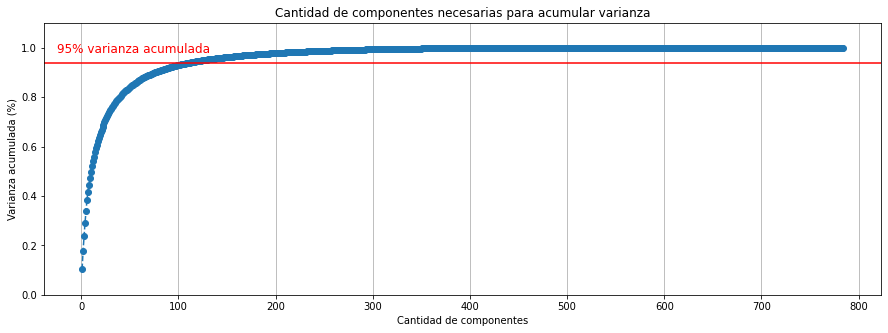

In [6]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
import numpy as np

size = 784
data = pd.read_csv("../data/train.csv")
data = data[:size]
data = data[data.columns[1:]].values


alpha = min(size, 784)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data)

from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)
print(reduced.shape)

pca = PCA().fit(data_rescaled)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)

fig, ax = plt.subplots()
xi = np.arange(1, alpha+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--')

for x in range(len(y)):
    if y[x] > 0.95:
        print(x)
        break

plt.xlabel('Cantidad de componentes')
#plt.xticks(np.arange(0, alpha+1, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Varianza acumulada (%)')
plt.title('Cantidad de componentes necesarias para acumular varianza')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(-25, 0.98, '95% varianza acumulada', color = 'red', fontsize=12)

ax.grid(axis='x')
plt.show()

(1000, 134)
(6000, 151)
(11000, 153)
(16000, 153)
(21000, 154)
(26000, 154)
(31000, 154)
(36000, 154)
(41000, 154)


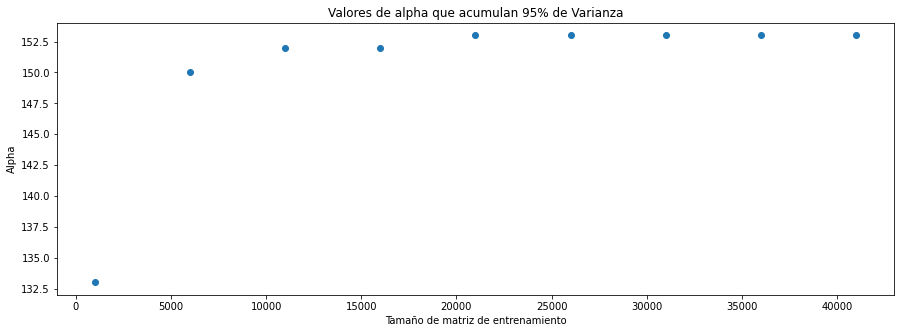

In [2]:
import warnings
import pandas as pd
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


partitions = list(range(1000,42001,5000))
data = pd.read_csv("../data/train.csv")
yData = []

for size in partitions:    
    part = data[:size]
    train = part[part.columns[1:]].values
    
    alpha = min(size,784)
    
    scaler = MinMaxScaler()
    data_rescaled = scaler.fit_transform(part)

    pca = PCA(n_components = 0.95)
    pca.fit(data_rescaled)
    reduced = pca.transform(data_rescaled)

    pca = PCA().fit(data_rescaled)
    
    plt.rcParams["figure.figsize"] = (15,5)

    y = np.cumsum(pca.explained_variance_ratio_)
    for x in range(len(y)):
        if y[x] > 0.95:
            yData.append(x)
            break
    
plt.scatter(partitions, yData)
plt.title('Valores de alpha que acumulan 95% de Varianza')
plt.xlabel('Tamaño de matriz de entrenamiento')
plt.ylabel('Alpha')
plt.show()